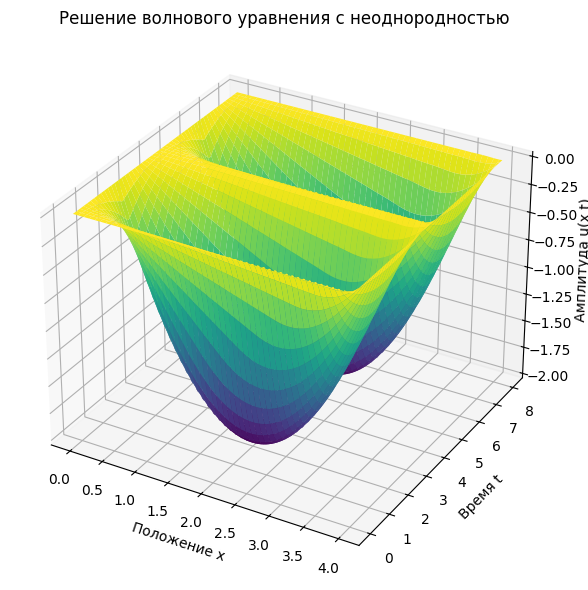

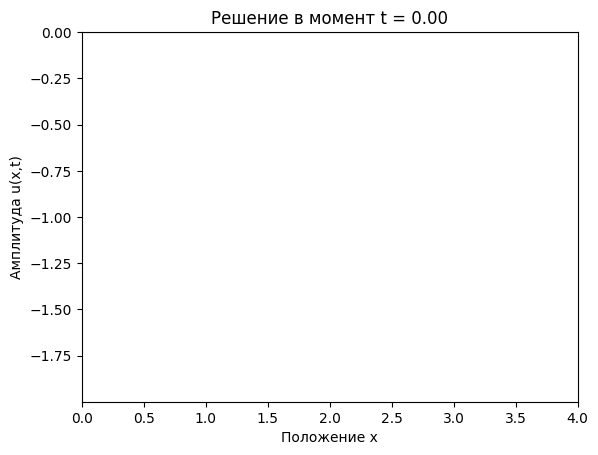

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Параметры задачи
L = 4.0  # длина струны
T = 8.0  # время моделирования
c = 2.0  # коэффициент из уравнения (sqrt(4))

# Параметры сетки
Nx = 100  # количество точек по пространству
Nt = 500  # количество точек по времени
dx = L / (Nx - 1)
dt = T / (Nt - 1)

# Проверка устойчивости (Курант)
if c * dt / dx > 1:
    print("Предупреждение: схема может быть неустойчивой!")

# Сетки
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
u = np.zeros((Nt, Nx))

# Начальные условия
u[0, :] = 0  # u(x,0) = 0
u[1, :] = 0  # u_t(x,0) = 0

# Неоднородный член
F = -x  # правая часть уравнения

# Численное решение (явная схема)
for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n+1, i] = (c**2 * dt**2 / dx**2) * (u[n, i+1] - 2*u[n, i] + u[n, i-1]) \
                   + 2*u[n, i] - u[n-1, i] \
                   + dt**2 * F[i]
    
    # Граничные условия
    u[n+1, 0] = 0
    u[n+1, -1] = 0

# Визуализация
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x, t)
ax.plot_surface(X, T, u, cmap='viridis')

ax.set_xlabel('Положение x')
ax.set_ylabel('Время t')
ax.set_zlabel('Амплитуда u(x,t)')
ax.set_title('Решение волнового уравнения с неоднородностью')

plt.tight_layout()
plt.show()

# Анимация
fig2, ax2 = plt.subplots()
line, = ax2.plot(x, u[0, :])
ax2.set_xlim(0, L)
ax2.set_ylim(np.min(u), np.max(u))
ax2.set_xlabel('Положение x')
ax2.set_ylabel('Амплитуда u(x,t)')
ax2.set_title('Анимация решения')

def update(frame):
    line.set_ydata(u[frame, :])
    ax2.set_title(f'Решение в момент t = {t[frame]:.2f}')
    return line,

ani = FuncAnimation(fig2, update, frames=Nt, interval=50, blit=True)
plt.show()

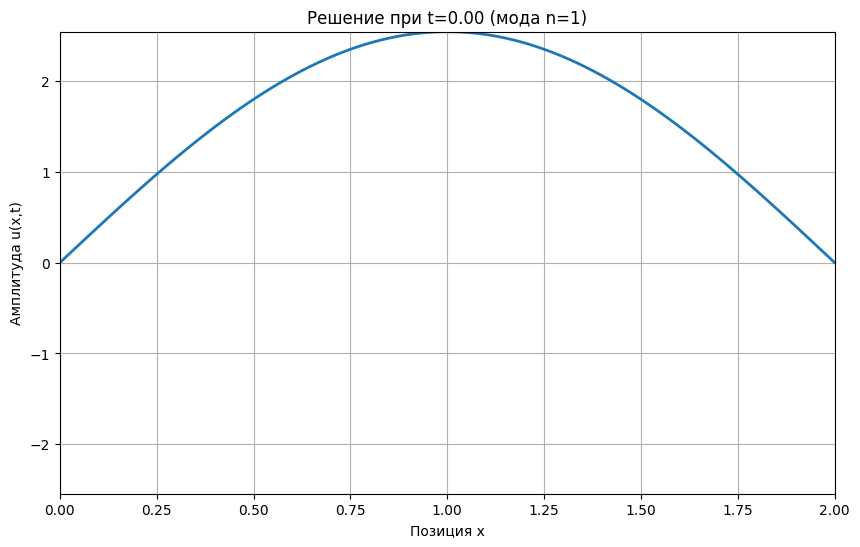

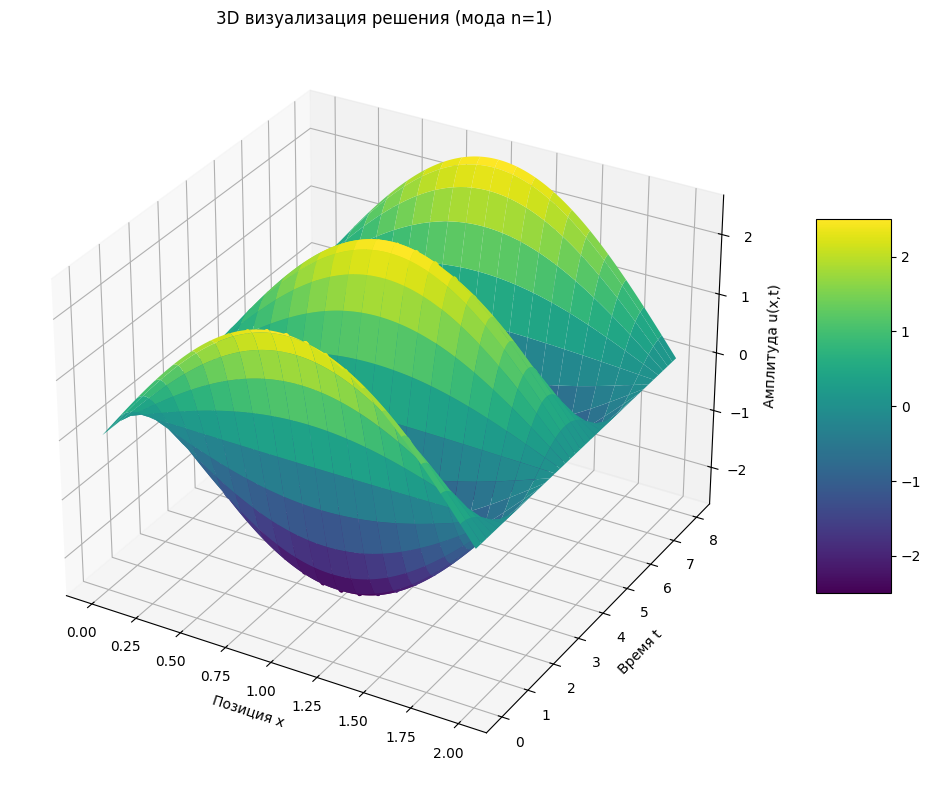

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Параметры
n = 1  # номер моды
L = 2   # длина области (из формулы sin(πn x/2) ⇒ L=2)
T_max = 8  # максимальное время
x_points = 100
t_points = 200

# Создаем сетку
x = np.linspace(0, L, x_points)
t = np.linspace(0, T_max, t_points)
X, T = np.meshgrid(x, t)

# Ваша формула решения
def u(x, t, n):
    term = (np.sin(0.5*np.pi*n*(t-4)) - np.sin(0.5*np.pi*n*t) 
            + 2*np.pi*n*np.cos(0.5*np.pi*n*(t-4)))
    return (4/(np.pi**2 * n**2)) * np.sin(0.5*np.pi*n*x) * term

# Вычисляем решение
U = u(X, T, n)

# 1. Анимация
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, U[0, :], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('Позиция x')
ax.set_ylabel('Амплитуда u(x,t)')
ax.set_title(f'Решение волнового уравнения (мода n={n})')
ax.grid()

def update(frame):
    line.set_ydata(U[frame, :])
    ax.set_title(f'Решение при t={t[frame]:.2f} (мода n={n})')
    return line,

ani = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# 2. 3D визуализация
fig3d = plt.figure(figsize=(12, 8))
ax3d = fig3d.add_subplot(111, projection='3d')
surf = ax3d.plot_surface(X, T, U, cmap='viridis', rstride=5, cstride=5)

ax3d.set_xlabel('Позиция x')
ax3d.set_ylabel('Время t')
ax3d.set_zlabel('Амплитуда u(x,t)')
ax3d.set_title(f'3D визуализация решения (мода n={n})')
fig3d.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()